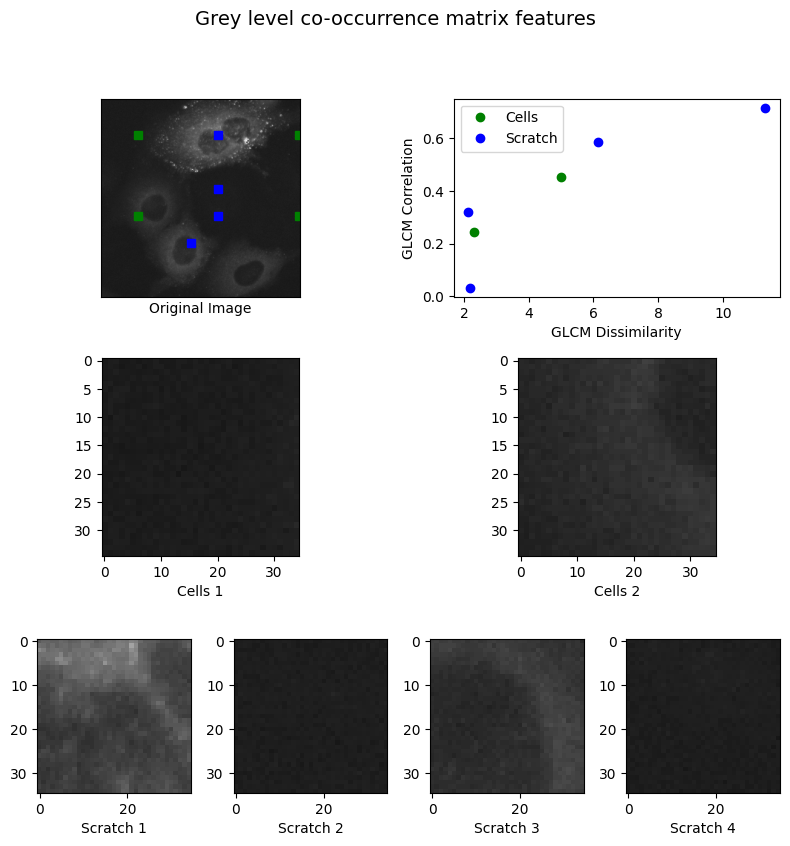

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import io
import cv2
import numpy as np

PATCH_SIZE = 35

#image = io.imread('solar_panel_1.jpg')
#plt.imshow(image, cmap='gray')

image = io.imread('glcm_input1.png')

# Convert to grayscale if it's a color image
if image.ndim == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Full image
GLCM = graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
a= graycoprops(GLCM, 'energy')[0, 0]

# select some patches from grassy areas of the image
cell_locations = [(50, 50), (200, 50), (50, 350), (200, 350)]
# cell_patches = []
# for loc in cell_locations:
#     cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
#                                loc[1]:loc[1] + PATCH_SIZE])
cell_patches = []
for loc in cell_locations:
    y, x = loc
    if y + PATCH_SIZE <= image.shape[0] and x + PATCH_SIZE <= image.shape[1]:
        cell_patches.append(image[y:y + PATCH_SIZE, x:x + PATCH_SIZE])



# select some patches from sky areas of the image
scratch_locations = [(50, 200), (150, 200), (250, 150), (200, 200)]
# scratch_patches = []
# for loc in scratch_locations:
#     scratch_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
#                              loc[1]:loc[1] + PATCH_SIZE])
scratch_patches = []
for loc in scratch_locations:
    y, x = loc
    if y + PATCH_SIZE <= image.shape[0] and x + PATCH_SIZE <= image.shape[1]:
        scratch_patches.append(image[y:y + PATCH_SIZE, x:x + PATCH_SIZE])


# compute some GLCM properties each patch
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (cell_patches + scratch_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(graycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(graycoprops(glcm, 'correlation')[0, 0])
    homogen.append(graycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(graycoprops(glcm, 'energy')[0, 0])
    contrast.append(graycoprops(glcm, 'contrast')[0, 0])


# OPTIONAL PLOTTING for Visualization of points and patches
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))

for i, patch in enumerate(scratch_patches):
    ax = fig.add_subplot(3, len(scratch_patches), len(scratch_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Scratch %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.savefig('glcm_output1.png')
plt.show()

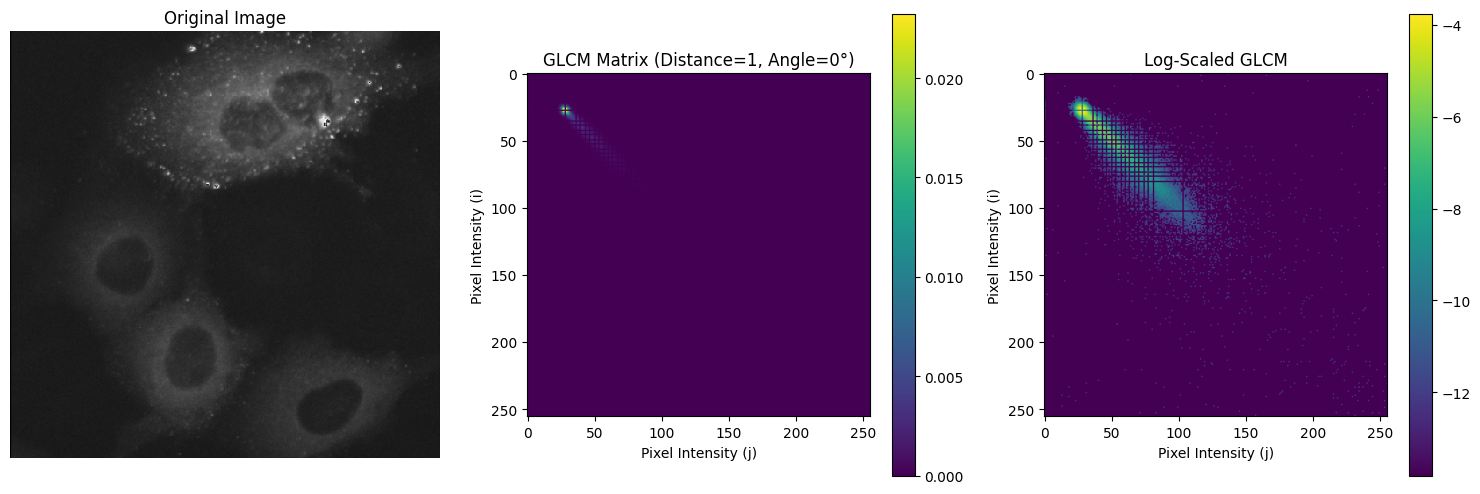

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data

# Load the image
image = cv2.imread('glcm_input1.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Corrected line

# Compute GLCM (distance=1 pixel, angle=0°)
glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
glcm_matrix = glcm[:, :, 0, 0]  # Extract the matrix for distance=1, angle=0°

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original image (color)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #Corrected line to display in right colors
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot GLCM matrix as a heatmap
axes[1].imshow(glcm_matrix, cmap='viridis', interpolation='nearest')
axes[1].set_title("GLCM Matrix (Distance=1, Angle=0°)")
axes[1].set_xlabel("Pixel Intensity (j)")
axes[1].set_ylabel("Pixel Intensity (i)")
plt.colorbar(axes[1].imshow(glcm_matrix, cmap='viridis'), ax=axes[1])

# Plot normalized GLCM for clarity
axes[2].imshow(np.log(glcm_matrix + 1e-6), cmap='viridis', interpolation='nearest')  # Log-scale for visibility
axes[2].set_title("Log-Scaled GLCM")
axes[2].set_xlabel("Pixel Intensity (j)")
axes[2].set_ylabel("Pixel Intensity (i)")
plt.colorbar(axes[2].imshow(np.log(glcm_matrix + 1e-6), cmap='viridis'), ax=axes[2])

plt.tight_layout()
plt.savefig('glcm_output2.png')
plt.show()